# 모델 복잡도와 모델 정확도
- 과대적합 : 모델이 너무 복잡하여 학습 데이터에 지나치게 최적화되고 일반화하기 어려움
- 과소적합 : 모델이 너무 단순하여 학습 데이터를 충분히 분석하지 못함
- 과대적합과 과소적합의 절충점을 바탕으로 모델의 일반화 성능을 최대화 시킬 수 있는 모델 생성

## 지도학습
- 결과값에 대한 라벨이 존재, 입력 데이터를 통해 출력 데이터가 어던 라벨인지 분류하는 예측수행
- 분류 기준
    - 이진 분류: 결과값에 대한 라벨이 두 가지(Y/N, Female/Male, Success/Fail) 종류
    - 다범주 분류 : n개의 범주로 이루어진 결과 값을 분류

## 의사결정 나무(Decision Tree)
- 의사결정 규칙을 도표화하여 관심 집단을 몇 개의 소집단으로 분류 / 예측하는 계량적 분석방법
- 의사결정나무 모델 학습 방법
    - 엔트로피 또는 지니계수를 통해 최적의 특징값을 선정하여 최상위 노드부터 분류 기준으로 적용
    - 반복적으로 노드를 생성하여 분류
    - 더 이상 노드를 생성할 수 없거나 지정한 높이에 도달하면 분류 종료
        - node: 분류 기준이 되는 특정 변수의 값
        - root node: 첫번째 분류 기준이 되는 최상위 노드
        - leaf node: 최상위 노드와 마지막 최종 노드 사이에 존재하는 중간 노드
        - leaf: 마지막 최종 노드
        - edge: 노드의 분류 결과(T/F)와 다음 노드를 연결
        - depth: 최종 노드가 생성될 때 까지의 단계
- 숫자형 결과를 반환하는 회귀트리(Regression Tree)와 범주형 결과를 반환하는 분류트리(Classification Tree)
- 직관적인 작동 방식으로 해석력이 아주 좋은 분류 모델로 평가
- 여러 개의 변수들에 대해 각각의 중요도를 평가 할 수 있음
- 입력 데이터에 대해 범주형 데이터와 숫자형 데이터 모두 적용할 수 있으나 범주형 데이터의 경우 라벨 인코딩 적용
    - sklearn.preprocessing > OneHotEncoder
- 결과 값에 대해 이진 분류와 다범주 분류 모두 가능

- 과적합(Over-fitting) 관리 필요
    - 학습한 데이터와 다른 새로운 데이터에 대해 일반화하는 성능이 떨어져 과적합 경향이 큰 것이
      의사결정나무의 최대 약점
    - depth가 지나치게 크면 과적합 경향이 높음
        - clf.set_param(max_depth=n)
    - 새로운 node가 생성될 때 사용되는 sample의 개수가 지나치게 작으면 과적합 경향이 높음
        - min_samples_split, min_samples_leaf
    - 차원(사용되는 변수)이 너무 많으면 과적합 경향이 높음
        - max_features,PCA
- 정보획득, 불순도 : Gini Index(기본값) , Entropy Index
    - 확률 변수가 담고 있는 정보(범주)가 얼마나 섞여 있는가를 나타내는 지표
    - 분류 후의 순도 증가/불순도 또는 불확실성 감소가 가장 큰 변수를 우선적으로 분류 기준으로 적용
    - 최종적으로 0이 되면 균일한 정보(범주)로 이루어진 데이터

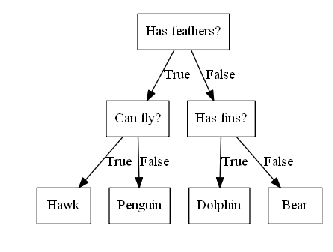

In [4]:
# anaconda prompt
# 1. pip install mglearn
# 2. conda install graphviz
# 3. conda install python-graphviz
# graphviz 환경변수 설정
import os

os.environ['PATH'] += os.pathsep + r'C:\Users\winst\Anaconda3\Library\bin\graphviz'
import mglearn
mglearn.plots.plot_animal_tree()

In [5]:
# 의사결정 나무 예시
import pandas as pd
import numpy as np
from sklearn import datasets
iris=datasets.load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
# 독립(X) 종속(y) 변수 분리
# X : data
# y: target
iris_x=iris.data
iris_y=iris.target

In [9]:
iris_x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# 학습, 평가 데이터 분리
# sklearn 에서 제공하는 학습/평가데이터 분리 모듈을 사용하기 위해서는 
# 독립변수와 종속변수를 분리해서 전달해야한다.
# 일반적으로 학습: 평가 = 8:2 , 7:3, 7.5:2.5, 6:4
# 평가 데이터는 무조건 1회(최종평가에만)만 사용해야한다.
# 이유: 평가 데이터의 목적은 모델의 일반화 성능을 평가하기 위함
# 일반화 => 모델이 새로운 데이터에 대해서 얼마나 예측을 잘하나 


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# iris_x, iris_y
# train_test_split(독립변수, 종속변수, test_size=.2)
# test_size = .25(default)
# 반환값 순서 : 학습x , 평가x , 학습y, 평가y
train_x,test_x,train_y,test_y=train_test_split(iris_x,iris_y,test_size=.2)

In [14]:
iris_x.shape[0]*0.8

120.0

In [16]:
train_x.shape

(120, 4)

In [17]:
train_y

array([2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 1, 0, 0])

In [19]:
# 파이썬 머신러닝 패키지
from sklearn.tree import DecisionTreeClassifier

In [20]:
# 의사결정나무 모델 객체 생성
# 기본값: 가지치기를 하지 않은 최대깊이의 의사결정나무 모델 생성
clf=DecisionTreeClassifier()

In [21]:
# 모델 학습
# model_obj.fit(학습x,학습y)
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
# 학습용 입력 데이터에 대한 결과 값
# 학습 성능
train_pred=clf.predict(train_x)
train_pred

array([2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 1, 0, 0])

In [25]:
np.unique(iris.target)

array([0, 1, 2])

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
# 학습 데이터에 대한 확률값 반환
train_proba=clf.predict_proba(train_x)
train_proba

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0

In [26]:
# 학습 데이터에 대한 분류 결과에 대한 정확도 계산
# 결과 해석: 학습 데이터에 대해서 100 % 예측 정확도를 보임
# 과적합 경향을 보인다.
clf.score(train_x,train_y)

1.0

In [27]:
# 테스트 데이터에 대한 모델 결과값
test_pred=clf.predict(test_x)
test_pred

array([2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1,
       1, 0, 0, 0, 2, 0, 2, 2])

In [28]:
# test data 에 대한 확률값 반환
test_proba= clf.predict_proba(test_x)
test_proba

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [29]:
clf.score(test_x,test_y)

0.9333333333333333

## 의사결정나무 모델 결과 시각화

In [30]:
# graphviz 라이브러리 사용
# tree 라이브러리 사용
from sklearn import tree

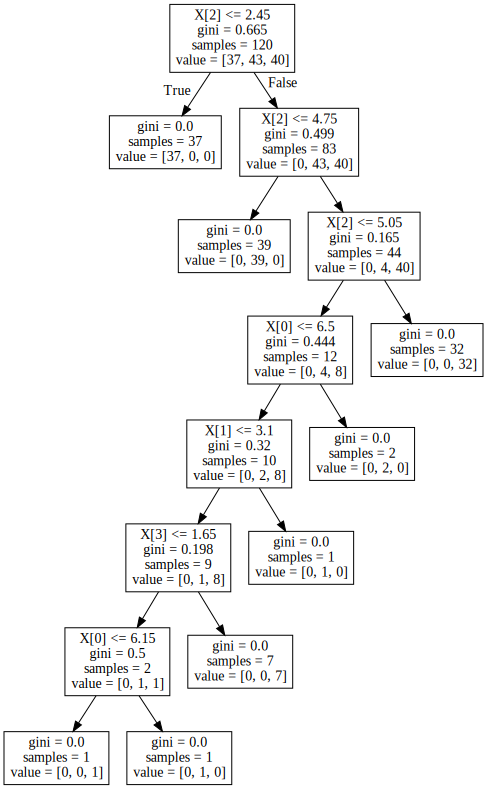

In [31]:
# 시각화 이미지 처리
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph

In [32]:
# 옵션 추가 1 - 분류기준으로 사용된 특성값을 컬럼명으로 바꾸기
features=iris.feature_names

In [33]:
# 옵션 추가 2 - 결과값을 데이터 속성(종이름)으로 바꾸기
species=iris.target_names

In [34]:
# 옵션 추가 3 - 박스 색상 채우기 & 박스 모서리 둥글게
data=tree.export_graphviz(clf,feature_names=features,class_names=species,filled=True,rounded=True)

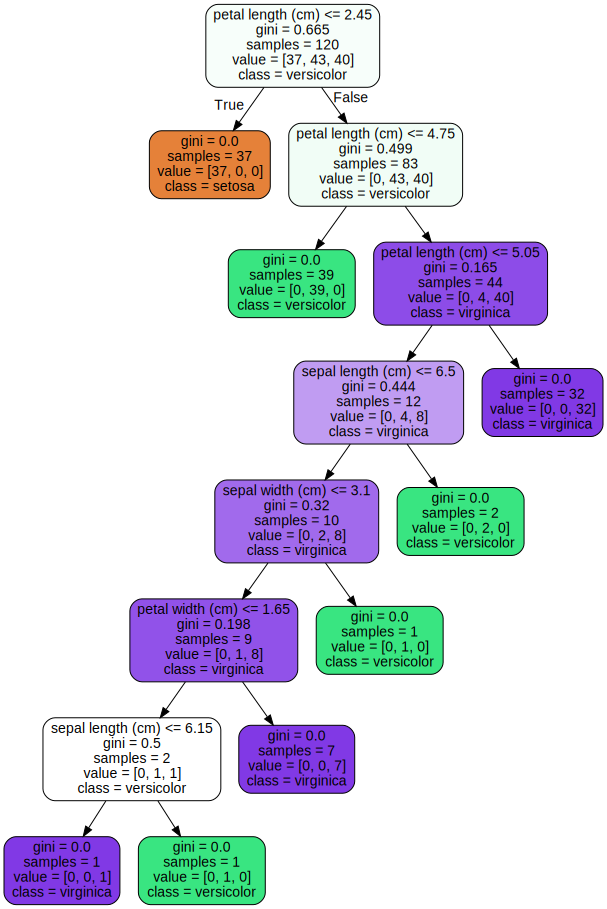

In [35]:
img=graphviz.Source(data)
img

In [36]:
# 결과물을 pdf 파일로 추출
img.render('iris')

'iris.pdf'

## 변수 중요도 추출

In [37]:
# 사용된 변수(특성)에 대해 중요도 추출
# fitted_model.feature_importances_
clf.feature_importances_

array([0.03924024, 0.01781117, 0.9332081 , 0.00974049])

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
# 모델이 사용한 독립변수 개수
clf.n_features_

4

In [40]:
# feature_importance 시각화
# barh_plot
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

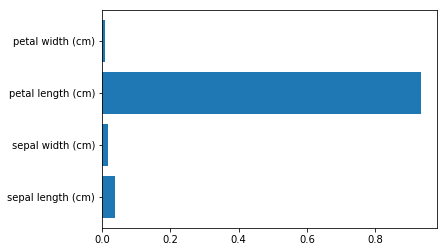

In [41]:
plt.barh(iris.feature_names,clf.feature_importances_)

In [43]:
# 최대깊이(max_length)를 3으로 제한한 의사 결정나무 모델 사용
# 앞서 생성한 최대 깊이의 의사결정나무 모델과 결과 비교
# 학습 성능
# 평가 성능
# 변수 중요도
clf2=DecisionTreeClassifier(max_depth=3)   # 모델 객체 생성

In [44]:
# 모델학습
clf2.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
# 학습 성능
clf2_pred=clf2.predict(train_x)
clf2_pred

array([2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 0])

In [48]:
clf2.score(train_x,train_y)

0.9666666666666667

In [49]:
clf2.fit(test_x,test_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
clf2_pred_test=clf2.predict(test_x)
clf2_pred_test

array([2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1,
       1, 0, 0, 0, 1, 0, 2, 2])

In [53]:
clf2.score(test_x,test_y)

1.0

In [56]:
clf2.feature_importances_

array([0., 0., 0., 1.])

In [57]:
clf2.predict_proba(train_x)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0

### 랜덤 포레스트
- Ensemble method(앙상블 기법)의 한 종류로 많은 의사결정나무로 이루어진 지도학습 모델
- 각각의 의사결정 나무에서 사용되는 특징값들을 무작위로 선정
- 여러 의사결정나무의 평균 예측값을 사용하여 분류함으로써 단일 의사결정나무의 취약점인 과적합을 보완
- 데이터 특징값에 대한 해석 및 통찰을 얻기 어려움

In [58]:
# 랜덤포레스트 라이브러리
from sklearn.ensemble import RandomForestClassifier

In [59]:
# 랜덤포레스트 모델 객체 생성
rf=RandomForestClassifier()

In [60]:
rf.fit(train_x,train_y)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
# 학습용 입력 데이터에 대한 결과값
rf.predict(train_x)

array([2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 1, 0, 0])

In [62]:
rf.score(train_x,train_y)

1.0

In [63]:
rf.score(test_x,test_y)

0.9333333333333333

In [64]:
# forest로 구성된 개별 decisiontree
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1079907373, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1224260303, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_we

In [65]:
# randomforest feature_importances_
rf.feature_importances_

array([0.10569889, 0.02486102, 0.29841162, 0.57102848])

## K-NN 알고리즘(K-Nearest Neighbors)
- 예측하려는 데이터에 대해 거리(유사성)가 가장 가까운 데이터(이웃)를 찾아 예측에 사용하는 알고리즘
- 둘 이상의 데이터(이웃)을 선택할 때 데이터가 많은 클래스를 기준으로 최종 이웃으로 선택
- 이해하기 매우 쉽고 매개변수에 대한 복잡한 조정없이 쉽게 좋은 성능을 발휘
- 학습 데이터의 크기가 너무 크면(변수의 개수,데이터의 개수 등)처리 속도가 느려짐
- 데이터를 구성하는 값이 대부분 0인경우 잘 동작하지 않음
- 데이터 간 거리를 측정할 때 값의 범위(단위)가 다를 경우 범위가 작은 데이터에 영향을 크게 받기 때문에 단위를 통일시키는 정규화 과정이 필요
- 주요 매개변수
    - metric & p : 데이터 간 거리를 측정하는 방식, 기본값 = minkowski & 2 =euclidian(여러환경에서 잘 동작하여 일반적으로 사용됨)
    - n_neighbors : 이웃의 개수
- 결정경계(decision boundary)
    - 클래스들 간의 영역을 구분하는 경계
    - 이웃(n_neighbors)의 수가 증가할 수록 부드러운 결정 경계 생성=> 단순한 모델을 의미
    - 이웃의 수가 작으면 모델의 복잡도가 증가
    - 일반적으로 모델의 복잡도가 높아질수록 학습데이터에 대한 정확도는 높아지지만 새로운 데이터에 일반화하는 성능은 낮아지는 경향
    - 이웃의 수를 증가시키면 학습 데이터에 대한 정확도는 낮아지더라도 테스트 데이터에 대한 정확도가 향상되며 안정적인 예측값을 얻을 수 있음
    - 이웃의 수가 많다고 해서 무조건 테스트 데이터에 대한 정확도가 높은 것은 아님

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


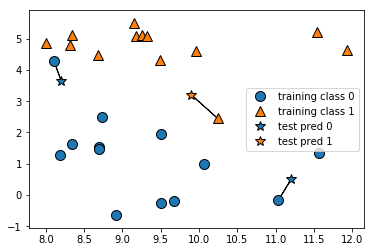

In [66]:
# KNN 예제 이미지
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\winst\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


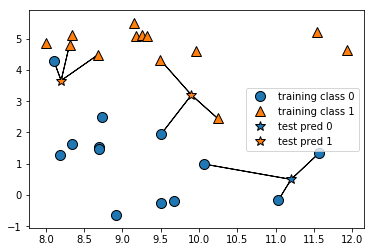

In [67]:
# n_neighbor=3:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
# train_x, train_y , test_x, test_y

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# n_neighbors=5(default)
knn=KNeighborsClassifier()

In [70]:
# 모델학습
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
knn.predict(train_x)

array([2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 1, 0, 0])

In [72]:
knn.score(train_x,train_y)

0.975

In [73]:
knn.score(test_x,test_y)

0.9333333333333333

In [144]:
train_x,test_x,train_y,test_y=train_test_split(iris_x,iris_y,test_size=.2)

In [161]:
# 이웃의 수에 따른 모델 정확도 산출(학습성능, 일반화 성능값 비교)
train_list=[]
test_list=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    train_list.append(knn.score(train_x,train_y))
    test_list.append(knn.score(test_x,test_y))

In [163]:
train_list

[1.0,
 0.9833333333333333,
 0.9833333333333333,
 0.9916666666666667,
 0.9916666666666667,
 0.9916666666666667,
 0.9833333333333333,
 0.9916666666666667,
 0.9833333333333333,
 0.9833333333333333]

In [164]:
test_list

[0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9333333333333333]

In [165]:
df=pd.DataFrame()

In [166]:
df['train']=train_list
df['test']=test_list

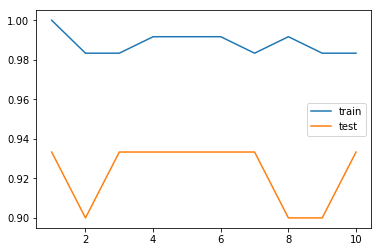

In [169]:
plt.plot(range(1,11),train_list,label='train')
plt.plot(range(1,11),test_list,label='test')
plt.legend()
plt.show()

Text(0, 0.5, 'score')

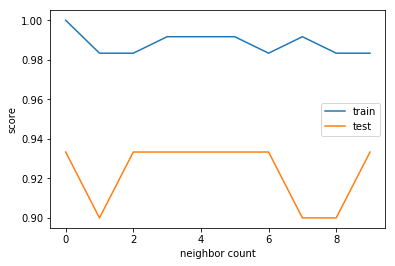

In [167]:
df.plot()
plt.xlabel('neighbor count')
plt.ylabel('score')